In [ ]:
# %pip install scipy
# %pip install matplotlib
# %pip install SpeechRecognition
# %pip install wave
%pip install dtw-python

In [ ]:
from dtw import * 
dtw
help(DTW)

Conversão para .WAV

In [ ]:
# # import required modules
# import subprocess

# # convert to wav file
# subprocess.call(['ffmpeg', '-i', 'racionais.mp3',
#                  'racionais.wav'])

Conversão audios estereos para mono

Text(0, 0.5, 'Amplitute')

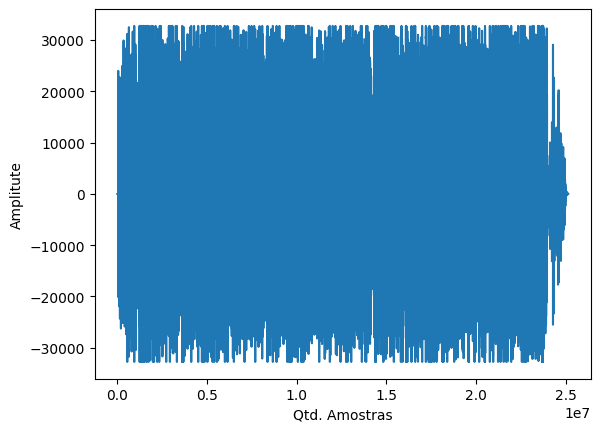

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav

rate, data = wav.read('racionais.wav')

# somando os dois canais e normalizando (passando de estereo para mono)
data = np.sum(data, axis=1) / 2 
plt.plot(data)
plt.xlabel('Qtd. Amostras')
plt.ylabel('Amplitute')

Converter qtd. amostra para tempo (Eixo X)

Text(0, 0.5, 'Amplitute')

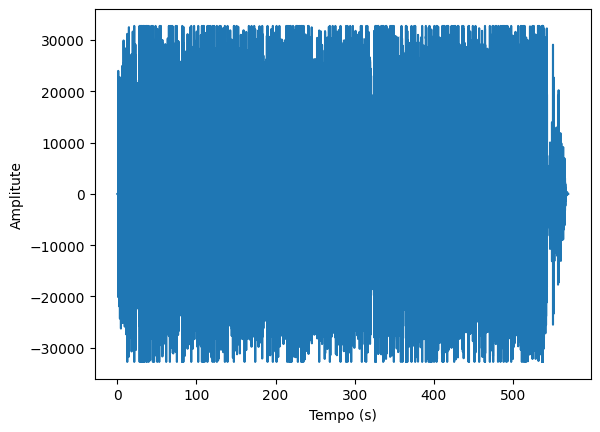

In [3]:
# encontrar o comprimento (total de amostras)
n = len(data)

# Frequencia de amostragem por sinal (quantas amostras por segundo)
fs = 44100 #48khz (audio) ou 44100 44.1khz (padrao spotify apple music) 
# https://emastered.com/pt/blog/sample-rate-for-audio#:~:text=A%20melhor%20taxa%20de%20amostragem,da%20sua%20onda%20sonora%20original.


T = 1/fs # tempo entre uma amostra e outra (inverso entre uma amostra e outra)

t = np.arange(0,n/fs,T) # (vetor de tempo) começa em 0seg, vai até o valor final do comprimento / frequencia de amostragem, e vai andando de T em T (valor calculado na variavel T)

plt.plot(t, data)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitute')

Transformada de Fourier

Text(0, 0.5, 'Amplitute')

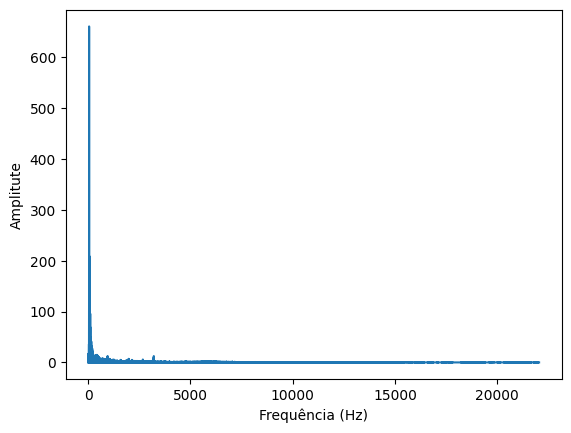

In [4]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# saindo de segundos e indo para hz
f = fftfreq(n,T)

# numero complexo (transformada)
transf = fft(data)

# módulo - para tirar os números complexos (módulo)
transf = np.abs(transf)

plt.plot(f[f > 0],transf[f > 0]*1/n) # mascara para pegar apenas os sinais com frequencias maiores que zeros e normalização o eixo vertical (dividir a transformada pelo tamanho do sinal)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitute')

In [5]:
# chunksize = 1024 # tamanho que o array será dividido (cada chunk tem esse tamanho) 1024 elementos
# chunks = int(len(transf) / chunksize)
# result = []

# for j in range(chunks):
#     arraychunk = np.zeros(chunksize) # criação de novo array preenchido com zero
#     for i in range(chunksize):
#         arraychunk[i] = transf[(j * chunksize) + i] # mapeando a porção do array transf correspondente ao pedaço j no arraychunk
#     result.append(arraychunk)
# print(result[0][0])

762498.0000000002


In [7]:
ranges = np.arange(40, 301, 10)  # Intervalos de 10 em 10 Hz
fuzfactor = 1  # Fator de ajuste menor para mais precisão

# Inicialização dos highscores e points para os intervalos de interesse
highscores = [0] * len(ranges)
points = [0] * len(ranges)

# Processamento da transformada completa
for freq in range(40, 301):
    if transf[freq] > 0:
        mag = np.log(np.abs(transf[freq]) + 1)
        i = 0
        while i < len(ranges) and ranges[i] < freq:
            i += 1
        if i < len(ranges) and mag > highscores[i]:
            highscores[i] = mag
            points[i] = freq

# Cálculo da hashtag única com mais detalhes
h = 0
for i in range(len(points)):
    h += (points[i] - (points[i] % fuzfactor)) * (10 ** (len(points) - i - 1))

print(f"Hashtag: {h}")

# Extraindo os pontos individuais para leitura
h_copy = h
extracted_points = []

for i in range(len(points)):
    factor = 10 ** (len(points) - i - 1)
    point = (h_copy // factor) * fuzfactor
    extracted_points.append(point)
    h_copy %= factor

print(f"Frequencias: {extracted_points}")


Hashtag: 4469116860679690415822548579
Frequencias: [44, 6, 9, 1, 1, 6, 8, 6, 0, 6, 7, 9, 6, 9, 0, 4, 1, 5, 8, 2, 2, 5, 4, 8, 5, 7, 9]
